# Imporing essentials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Loading the Data

In [2]:
df = pd.read_csv('gld_price_data.csv')

# Data Analysis

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


### Correlations

In [15]:
correlation = df.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

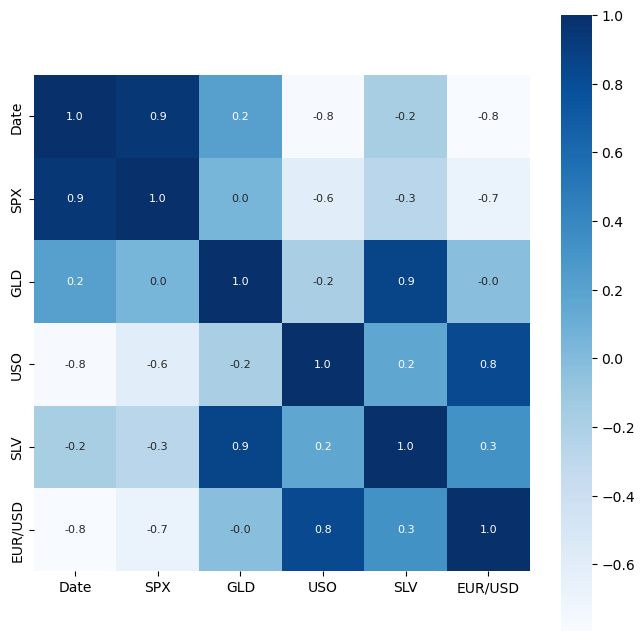

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Jerry Tanwar\AppData\Local\Temp\ipykernel_5876\1428526023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

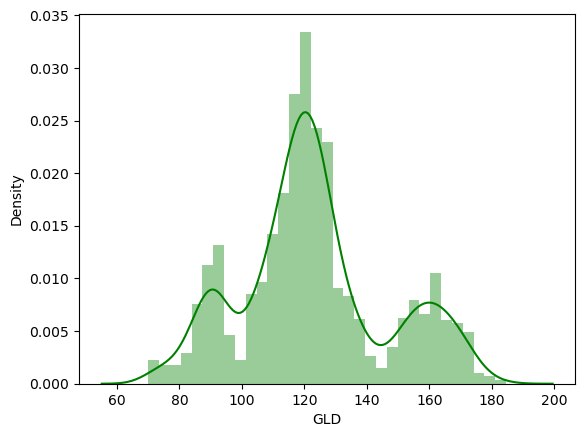

In [18]:
# checking distribution of GLD Price
sns.distplot(df['GLD'], color='green')

Splitting Features and Target

In [19]:
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [20]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [21]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

## Hyperparameter tuning by GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

- GridSearchCV will choose suitable 'n_estimators' for Random Forest Regressor for building ML model

In [24]:
parameters = {'n_estimators':[100,200]}

In [25]:
rf = RandomForestRegressor()

In [26]:
model = GridSearchCV(rf, parameters)

In [27]:
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200]})

# Model Evaluation

Prediction on X_test data

In [28]:
test_pred = model.predict(X_test)

In [29]:
test_pred

array([122.6414993 , 130.31520256, 127.60659971,  96.64739768,
       118.62780097, 114.63209963, 124.69350119, 117.72679923,
       107.97560129,  98.32379972,  95.5909996 , 167.85319797,
       149.56160126, 116.38400054, 170.91780125,  84.98259965,
       123.08499877, 109.74599721, 113.11910079, 131.58040353,
       124.39289871, 113.44960059, 115.79790139, 108.7735997 ,
       108.48020118, 125.87769881, 118.8677998 , 112.24919949,
       113.7250014 , 125.77729879, 146.23900221,  89.56510001,
       167.99229955, 113.70609921, 108.42600103, 120.06070107,
       141.50119917, 161.19030085, 174.08199794, 153.37510167,
       118.9501011 , 113.26100036, 121.41429933, 113.66599945,
       122.01330011, 108.09560097,  88.52299927, 114.49869943,
       129.80920178, 117.79520106, 103.34090019, 129.98210202,
       107.09879857, 160.55990306, 131.44520045, 118.19019972,
       147.27450023, 133.7685025 ,  95.53590124, 124.50690154,
       114.96719875,  86.12300074, 104.32739899, 113.72

In [30]:
from sklearn.metrics import r2_score

In [31]:
error_score = r2_score(y_test, test_pred)
print("R Squared Error : ",error_score )

R Squared Error :  0.9899901921789092


In [32]:
Y_test = list(y_test)
# Y_test

# Data Visualization

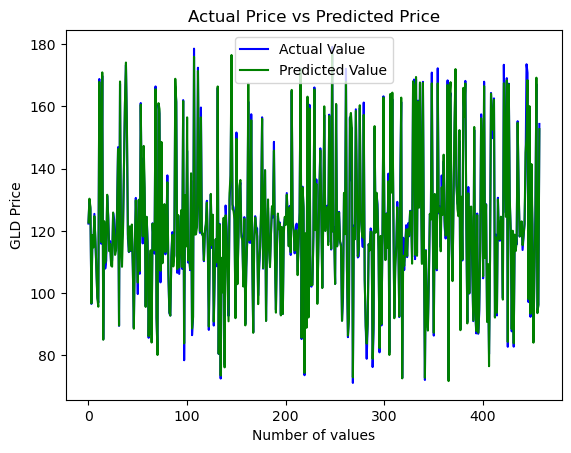

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_pred, color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()